# Consumers' info Preliminary Analysis

In [1]:
import folium
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


## 1.1 Assumptions
Every consumer is using BNPL for personal usage.

In [2]:
# read files

sf = gpd.read_file("../data/external/SA2_2021/SA2_2021_AUST_GDA2020.shp")
zones = pd.read_csv("../data/external/australian_postcodes.csv")
df = pd.read_parquet("../data/curated/consumer/")
df

,consumer_id,user_id,name,address,state,postcode,gender
0,28,458885,Gregory Barrett,7083 Carson Lane,WA,6176,Male
1,78,319257,Cory Best,992 Becky Junction,SA,5410,Male
2,101,9180,Jasmine Sanchez,598 Johnson Motorway Apt. 104,SA,5554,Female
3,108,191536,Karen Robinson,638 Chen Islands Suite 258,SA,5052,Female
4,133,234634,Christopher Cook,701 Diaz Walks Apt. 086,WA,6985,Male
...,...,...,...,...,...,...,...
499994,1499570,400937,Terry Johnson,884 Nicole Pine,VIC,3579,Female
499995,1499611,206860,Lisa King,95327 Walter Island,SA,5134,Female
499996,1499869,381121,Elizabeth Moore,21645 Jackson Landing Apt. 066,QLD,4403,Female
499997,1499911,56561,Rhonda Berry,02494 Day Islands Apt. 198,WA,6105,Female


In [3]:
income_df = pd.read_excel('../data/external/total_income.xlsx', sheet_name='Table 1.4')
income_df

,Australian Bureau of Statistics,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27
0,Personal Income in Australia Table 1. Total In...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Released at 11:30 am (Canberra time) 22/01/2021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Table 1.4,Total Income by Statistical Area Level 2 (2014...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,Earners (persons),NaN,NaN,NaN,NaN,Median age of earners (years),NaN,NaN,...,NaN,NaN,NaN,NaN,Mean ($),NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2301,801111140,ACT - South West,349,289,347,364,355,40,39,39,...,62592,55384,61096,64227,62505,72858,70503,67445,73435,NaN
2302,801111141,Namadgi,np,np,21,19,18,np,np,34,...,np,49981,58498,40479,np,np,57309,56357,39278,NaN
2303,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2304,Totals may not align with the sum of their com...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
income_df1 = income_df.drop(income_df.index[0:6], inplace=False).reset_index(drop=True)
income_df1.columns = income_df.iloc[5].values.flatten().tolist()
income_df1 = (income_df1.iloc[:, [0, 1, 26]])
income_df1.drop(income_df1.index[2297:2300], inplace=True)
income_df1.rename(columns={'2018-19':'Mean Total Income'}, inplace=True)
income_df1['Mean Total Income'].replace('np', np.NAN)
income_df1.dropna().reset_index()
#income_df1.astype({'SA2': 'int'})

,index,SA2,SA2 NAME,Mean Total Income
0,2,101021007,Braidwood,51149
1,3,101021008,Karabar,66335
2,4,101021009,Queanbeyan,65874
3,5,101021010,Queanbeyan - East,69860
4,6,101021011,Queanbeyan Region,81919
...,...,...,...,...
2283,2292,801101137,Molonglo,np
2284,2293,801101138,Molonglo - North,np
2285,2294,801101139,Wright,86007
2286,2295,801111140,ACT - South West,73435


In [5]:
(income_df1['Mean Total Income'] == 'np').sum()

44

In [6]:
# missing value checking for mean total income
SA2_missing = (income_df1['SA2 NAME'].where(income_df1['Mean Total Income'] == 'np')).dropna()
SA2_missing.size

44

In [7]:
sf['geometry'] = sf['geometry'].to_crs("+proj=longlat +ellps=WGS84 +datum=WGS84 +no_defs")
#sf.astype({'SA2_CODE21': 'int'})

In [8]:
sf.dtypes, income_df1.dtypes

(SA2_CODE21      object
 SA2_NAME21      object
 CHG_FLAG21      object
 CHG_LBL21       object
 SA3_CODE21      object
 SA3_NAME21      object
 SA4_CODE21      object
 SA4_NAME21      object
 GCC_CODE21      object
 GCC_NAME21      object
 STE_CODE21      object
 STE_NAME21      object
 AUS_CODE21      object
 AUS_NAME21      object
 AREASQKM21     float64
 LOCI_URI21      object
 geometry      geometry
 dtype: object,
 SA2                  object
 SA2 NAME             object
 Mean Total Income    object
 dtype: object)

In [9]:
zones.head()

,id,postcode,locality,state,long,lat,dc,type,status,sa3,...,MMM_2015,MMM_2019,ced,altitude,chargezone,phn_code,phn_name,lgaregion,electorate,electoraterating
0,230,200,ANU,ACT,149.11900,-35.277700,NaN,NaN,NaN,NaN,...,1.0,1.0,NaN,NaN,N2,NaN,NaN,NaN,Durack,NaN
1,21820,200,Australian National University,ACT,149.11890,-35.277700,NaN,NaN,Added 19-Jan-2020,NaN,...,1.0,1.0,NaN,NaN,N2,NaN,NaN,NaN,Durack,NaN
2,232,800,DARWIN,NT,130.83668,-12.458684,NaN,NaN,Updated 6-Feb-2020,70101.0,...,2.0,2.0,NaN,NaN,NT1,PHN701,Northern Territory,Darwin,Solomon,Inner Metropolitan
3,24049,800,DARWIN CITY,NT,130.83668,-12.458684,NaN,NaN,Updated 6-Feb-2020,70101.0,...,2.0,2.0,NaN,NaN,NT1,PHN701,Northern Territory,Darwin,Solomon,Inner Metropolitan
4,233,801,DARWIN,NT,130.83668,-12.458684,NaN,NaN,Updated 25-Mar-2020 SA3,70101.0,...,2.0,2.0,NaN,NaN,NT1,PHN701,NaN,NaN,Lingiari,Rural


## 1.2 Graphs

Gender: Check the consumer's distribution corresponding to gender
State: Check the consumer's distribution corresponding to state
Map


In [10]:
#map
geoJSON = sf[['SA2_CODE21', 'geometry']].drop_duplicates('SA2_CODE21').to_json()



map = folium.Map(location=[zones.lat.mean(), zones.long.mean()-10], tiles="Stamen Terrain", zoom_start=5)
map.add_child(folium.Choropleth(
    geo_data=geoJSON,
    name='choropleth',
))
map



c = folium.Choropleth(
    geo_data=geoJSON, # geoJSON 
    name='choropleth', # name of plot
    data=income_df1, # data source
    columns=['SA2','Mean Total Income'], # the columns required
    key_on='properties.SA2_CODE21', # this is from the geoJSON's properties
    fill_color='YlOrRd', # color scheme
    nan_fill_color='black',
    legend_name='Average Total Income'
)
c.add_to(map)
map


In [11]:
# gender distribution
gender_df = df[['gender', 'user_id']].groupby(['gender']).count()
gender_df

,user_id
gender,
Female,224946
Male,224979
Undisclosed,50074


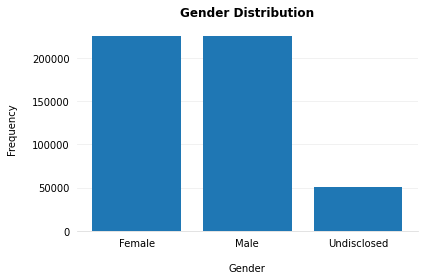

In [12]:
fig, ax = plt.subplots()
bars = ax.bar(
    x=np.arange(gender_df.size),
    height=gender_df['user_id'],
    tick_label=gender_df.index
)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_color('#DDDDDD')
ax.tick_params(bottom=False, left=False)
ax.set_axisbelow(True)
ax.yaxis.grid(True, color='#EEEEEE')
ax.xaxis.grid(False)

ax.set_xlabel('Gender', labelpad=15)
ax.set_ylabel('Frequency', labelpad=15)
ax.set_title('Gender Distribution', pad=10,
             weight='bold')

fig.tight_layout()
plt.savefig('../plots/gender distribution.jpg')
plt.show()
# relatively even

In [13]:
# state
state_df = df[['state', 'user_id']].groupby(['state']).count()
state_df

,user_id
state,
ACT,4664
NSW,144188
NT,7764
QLD,72861
SA,54973
TAS,18878
VIC,117525
WA,79146


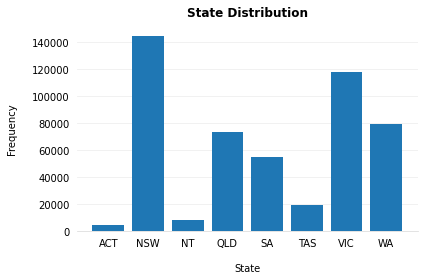

In [14]:
fig, ax = plt.subplots()
bars = ax.bar(
    x=np.arange(state_df.size),
    height=state_df['user_id'],
    tick_label=state_df.index
)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_color('#DDDDDD')
ax.tick_params(bottom=False, left=False)
ax.set_axisbelow(True)
ax.yaxis.grid(True, color='#EEEEEE')
ax.xaxis.grid(False)

ax.set_xlabel('State', labelpad=15)
ax.set_ylabel('Frequency', labelpad=15)
ax.set_title('State Distribution', pad=10,
             weight='bold')

fig.tight_layout()
plt.savefig('../plots/state distribution.jpg')
plt.show()

In [15]:
# gender and state
df_gender_state = df.groupby(['state', 'gender'])['name'].count()
df_gender_state

state  gender     
ACT    Female          2135
       Male            2065
       Undisclosed      464
NSW    Female         64677
       Male           65277
       Undisclosed    14234
NT     Female          3533
       Male            3434
       Undisclosed      797
QLD    Female         33132
       Male           32460
       Undisclosed     7269
SA     Female         24686
       Male           24706
       Undisclosed     5581
TAS    Female          8459
       Male            8453
       Undisclosed     1966
VIC    Female         52744
       Male           53000
       Undisclosed    11781
WA     Female         35580
       Male           35584
       Undisclosed     7982
Name: name, dtype: int64

<AxesSubplot:xlabel='state'>

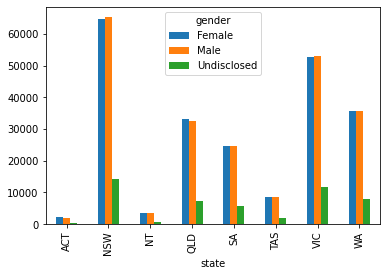

In [16]:

df_gender_state.unstack().plot(kind='bar')